In [1]:
!pip install alpha_vantage
!pip install seaborn
!pip install pandas_datareader

  Stored in directory: /home/jovyan/.cache/pip/wheels/bb/22/da/426cbebbe36cf3c0fd433d279f670cadfa27cc3343303cdf36
Successfully built alpha-vantage


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from alpha_vantage.timeseries import TimeSeries
from pandas import Series, DataFrame
import seaborn as sns
from pandas_datareader import data
from datetime import datetime

In [11]:
user_stock = input("Enter stock ticker or 'continue' for index data: ")
if user_stock == 'continue':
    new_symbol = '^GSPC'
else:
    new_symbol = user_stock.upper()

Enter stock ticker or 'continue' for index data: FB


In [12]:
ts = TimeSeries(key='06Y2VN2KRRA3ZF5Y', output_format='pandas')
try:
    stock_data, stock_meta_data = ts.get_daily(symbol=new_symbol, outputsize='full')
except ValueError:
    print('ValueError: Please try a different stock ticker')
except NameError:
    print('NameError: Try Again')

closing_df = stock_data['4. close']
    
beg = stock_data['4. close'][-1]
end = stock_data['4. close'][0]


In [13]:
#These are the returns for the past eleven market corrections.
bear_returns = [(-.2163), (-.2797), (-.2218), (-.3606),
                (-.4820), (-.2711), (-.3351), (-.3677),
                (-.3375),(-.5193), (-.2762)]

avg_drop = sum(bear_returns) / len(bear_returns)
print('%.4f' % avg_drop)

-0.3334


In [14]:
period_max =closing_df.max()
print(f"Relative Market High:", period_max)

Relative Market High: 217.5


In [15]:
indicator = period_max + (period_max * avg_drop)
print('%.4f' % indicator)
#If the S&P500 hits this mark we will know the market has reached its low

144.9875


In [16]:
#set alert
if end <= indicator:
    print('Market is at a relative low; time to buy!')
else:
    print('Market could be overpriced')

Market could be overpriced


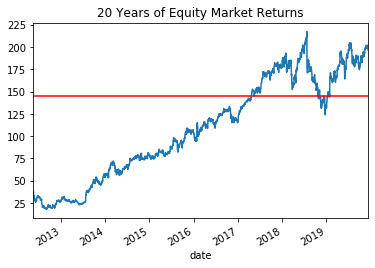

In [17]:
stock_data['4. close'].plot()
plt.axhline(indicator, color='red')
plt.title('20 Years of Equity Market Returns')
plt.show()

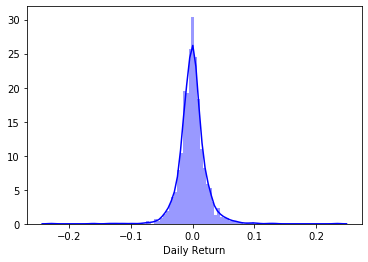

In [18]:
#The daily return measures the dollar change in a stock’s price as a percentage of the previous day’s closing price. 
#A positive return means the stock has grown in value, while a negative return means it has lost value. 
#A stock with lower positive and negative daily returns is typically less risky than a stock with higher daily returns, which create larger swings in value.
stock_data['Daily Return']=stock_data['4. close'].pct_change()

sns.distplot(stock_data['Daily Return'].dropna(),bins=100,color='blue')